# Projet Maths 3

# Questions théoriques

> **1. Quel théorème du cours nous autorise-t-il à estimer l’espérance conditionnelle par la moyenne empirique de simulations conditionnelles.**

Rappelons le théorême de la limite centrale : 

Si les $Z_n$ sont des variables aléatoires réelles, indépendantes et de même loi, de carré intégrable, d'espérance $m$ et de variance $\sigma^2 >0$, alors les variables $\frac{S_n -nm}{\sigma \sqrt{n}}$ convergent en loi vers une variable aléatoire de loi $\mathcal{N}(0,1)$.

En d'autres termes, $\sqrt{n}(M_n - m)$ converge vers une variable normale de loi $\mathcal{N}(0,\sigma^2)$

On en déduit que $n^\alpha (\frac{S_n}{n} - m)$ converge vers 0 (resp. $+\infty$) en probabilité lorsque $\alpha < 1/2$ (resp. $\alpha > 1/2$)

En particulier pour $\alpha = 0$ : 
$$\frac{S_n}{n} \to^\mathbb{P} m$$

Soit $(\Omega,\mathcal{A},\mathbb{P}_Z)$ l'espace probabilisé. Posons $Z_n$ le resultat du  n-ème tirage avec remise d'un élément de cet espace. Les $(Z_n)_\mathbb{N}$ vérifient les ocnditions d'application du **théorême de la limite centrale**. 



D'où en considérant le vecteur aléatoire conditionnel $Y|X=x$. En notant Y les valeurs prises aux points de discretisation sans observation et X les valeurs prises par les composantes aux sites d'observation. On a alors sans perte de généralité $Z = (X,Y)$ par permutations.

La moyenne des simulations conditionelles converge vers l'espérance conditionelle. **Il est donc approprié de l'approcher de cette façon.**

> **2. Rappeler la loi conditionnelle du vecteur des composantes de Z correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d’observation.**

Le vecteur aléatoire des composantes de $Z$ correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d’observation est noté $Z'$

En notant $Y$ les valeurs prises aux points de discretisation sans observation et $X$ les valeurs prises par les composantes aux sites d'observation. On a alors sans perte de généralité $Z = (X,Y)$ par permutations.

$Z'= Z|X=x = Y|X=x$ admet une densité $f_{Y|X=x}$
telle que 
$$f_{Y|X=x} =\frac{1}{(2\pi)^{k/2}\sqrt{det(CS_Y)}}exp(-\frac{1}{2}(y-\Psi(x))^\perp CS_Y^{-1}(y-\Psi (x)))$$

avec : 
$$
CS_Y = C_Y - C_{Y,X}C_X^{-1}C_{X,Y} 
$$

où on a  :

$$
E(Y|X=x) = \Psi(z)= m_Y + C_{Y,Z}C_Z^{-1}(z-m_Z)
$$


> **3. Si Y = (Y1, . . . , Yp) est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1, quelle est la loi du vecteur Z = m + RY où R est une matrice p × p et m est un vecteur de taille p ?**

Si Y est un vecteur de composantes gaussiennes indépendantes, toutes d'esperance nulle et de variance 1,  alors on peut caractériser cette variable aléatoire par sa fonction caractéristiques $\Phi_Y(u) =e^{i<u|m>-\frac{1}{2} <u|I_n u>}$

Or d'après le cours de Probabilté $III$ $\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>}\Phi_Y(R^\perp u)$

Ce qui dans notre cas nous donne : 

$$\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>}\Phi_Y(R^\perp u)$$

Donc Z suit la loi qui a pour fonction caractéristique : 
$$
\Phi_Z(u) = \Phi_{m+RY}(u) = e^{i<u|m>-\frac{1}{2} <R^\perp u| R^\perp u>}
$$


> **4. En déduire un algorithme de simulation conditionnelle.**

On en déduit donc qu'en utilisant une matrice R bien choisie on peut arriver simuler un vecteur gaussien conditionnel

En effet si on choisit la transformée de Cholesky de la matrice de covariance conditionelle $CS_Y$, que l'on notera $R$ :
En posant $Z'  = m +RY$ où $Y = (Y1, . . . , Yp)$ est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1

$\Phi_{Z'}(u) = e^{i<u|m> -\frac{1}{2}<R^\perp u|R^\perp u> }
 =  e^{i< u|m> -\frac{1}{2} <u|CS_Yu>}$ ( par symétrie de R ) 
 
$$
\Phi_{Z'}(u) = e^{i<u| m>-\frac{1}{2} <u|CS_Yu>}
$$

Donc $Z'$ est une variable aléatoire à densité, $Z'$ est un un vecteur gaussien

De plus Z'est de même loi que la variable aléatoire gaussienne $Y|X=x$ par identification des fonctions caractéristiques.

On peut donc proposer un algorithme de simulation : 

### Algorithme de simulation
--------

- Fixer les vealeurs aux points d'observations 
- Calculer la matrice de covariance conditionelle
- Calculer la transformée de Cholesky
- Simuler Y un vecteur gaussien centré réduit de composantes indépendantes
- Simuler Z par transformation affine
- Recommencer

In [10]:
# chargement dee dépendances 

import numpy as np 
import math
import matplotlib.pyplot as plt 
import random
import pandas as pd

In [11]:
#Discrétisation
A=0
B=500
N=101

#Nombre de points de discrétisation 
Delta = (B-A)/(N-1)
print(Delta)
discretization_indexes = np.arange(N) 
discretization = discretization_indexes*Delta 

#Paramètres du modèle
mu=-5
a = 50
sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])
#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


5.0


In [12]:
mu_vect = [mu for i in range(N)]

In [13]:
def C(h, a, sig_2):
    return (np.exp(-abs(h)/a)*sig_2)



In [14]:
def mat_distance(discretization):
    M=np.ones((len(discretization),len(discretization)))
    for i in range(len(discretization)):
        for j in range(len(discretization)):
            M[i,j] = abs(discretization[i] - discretization[j])
    return M 

In [15]:
covar = C(mat_distance(discretization), a, sigma2)

In [16]:
rows = np.array(observation_indexes, dtype=np.intp)
columns = np.array(observation_indexes, dtype=np.intp)
covar_obs_obs = covar[rows[:, np.newaxis], columns]

rows = np.array(unknown_indexes, dtype=np.intp)
columns = np.array(unknown_indexes, dtype=np.intp)
covar_unk_unk = covar[rows[:, np.newaxis], columns]

columns = np.array(unknown_indexes, dtype=np.intp)
rows = np.array(observation_indexes, dtype=np.intp)
covar_obs_unk= covar[rows[:, np.newaxis], columns]

In [17]:
esp_cond = np.array([mu for i in range(len(unknown_indexes))]) +  covar_obs_unk.transpose() @ np.linalg.inv(covar_obs_obs)@(np.array(depth) - [mu for i in range( len( observation_indexes)) ])

In [18]:
cov_cond = covar_unk_unk - covar_obs_unk.transpose()@np.linalg.inv(covar_obs_obs) @ covar_obs_unk

In [19]:
X=np.array([ cov_cond[i,i] for i in range (len(cov_cond))])

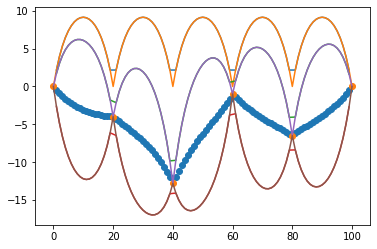

In [20]:
plt.scatter(unknown_indexes,esp_cond)
plt.scatter(observation_indexes,depth)
plt.plot(unknown_indexes,X)
plt.plot(builder([0,0,0,0,0,0],observation_indexes,X,N))
plt.plot(unknown_indexes,esp_cond+X)
plt.plot(unknown_indexes,esp_cond-X)
plt.plot(builder(depth,observation_indexes,esp_cond+X,N))
plt.plot(builder(depth,observation_indexes,esp_cond-X,N))

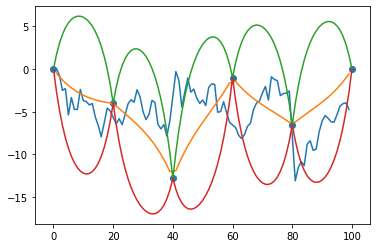

In [21]:
L = np.linalg.cholesky(cov_cond)
L = L.transpose()

def simul( L ):
    f= lambda u,v : np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    g= lambda u,v : np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v)
    Y = np.random.normal(0,1,len(unknown_indexes))
    Z = np.array([mu for i in range(len( unknown_indexes))])+ L@ Y
    return Z
Z = simul(L)
plt.plot(unknown_indexes,Z)


plt.plot(unknown_indexes, esp_cond)
plt.plot(builder(depth,observation_indexes,esp_cond+X,N))
plt.plot(builder(depth,observation_indexes,esp_cond-X,N))
plt.scatter(observation_indexes,depth)

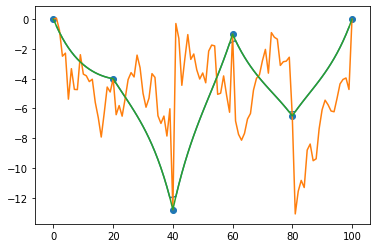

In [22]:
def builder(depth,observation_indexes, Z , N):
    prof = []
    depth_ =list(depth)
    Z_ = list(Z)
    for i in range (N):

        if i in observation_indexes :
            prof.append(depth_.pop(0))
        else : 
            prof.append(Z_.pop(0))
    return prof
prof = builder(depth, observation_indexes,Z,N)

plt.plot(unknown_indexes, esp_cond)
plt.plot(prof)
plt.scatter(observation_indexes,depth)
plt.plot(builder(depth,observation_indexes,esp_cond,N))

def longueur ( prof, delta):
    S = 0
    for i in range(1,len(prof)):
        S+= np.sqrt(delta**2 +(prof[i]-prof[i-1])**2)
    return S





In [23]:
def simul_N ( Number , Delta):
    length = []
    for i in range (Number):
        length.append(longueur(builder(depth,observation_indexes,simul(L),N),Delta))
    return length

np.array(simul_N(100,Delta)).mean()

537.6742774577729

In [24]:
print(Delta)
L_th = longueur(builder(depth,observation_indexes,esp_cond,N),Delta)
L_th


5.0


501.6468416918411

# 100 // 1000 // 10000 // 100000 simulations

In [50]:
simul_total = simul_N(1000,Delta)

info = []
num = [100,1000,100,100]
subplot_list = [221,222,223,224]

for borne, sub in zip(num,subplot_list):
    means = []
    simuls = np.array(simul_total[:borne])
    for i in range(1,len(simuls)):
        plt.subplot(sub)
        means.append(np.array(simuls[:i]).mean())
        plt.plot(means)
    info.append({ 
                ,mean : simuls.mean()
                ,std : simuls.std()
                ,conf : 1.960*std/np.sqrt(len(simuls))})

SyntaxError: invalid syntax (<ipython-input-50-ec8b89888b39>, line 15)

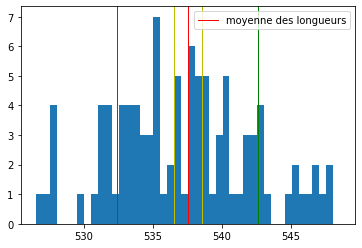

In [34]:

plt.hist(simuls, bins = np.arange(simuls.min(),simuls.max(),0.5), align = 'left')
plt.axvline(x=mean, linewidth=1, color='r', label = "moyenne des longueurs")
plt.axvline(x=mean +std, linewidth=1, color='g')
plt.axvline(x=mean - std, linewidth=1, color='g')
plt.axvline(x=mean - conf, linewidth=1, color='y')
plt.axvline(x=mean + conf, linewidth=1, color='y')
plt.legend()

In [35]:
# Calculer la fonction de répartition expérimentale

def F_repart(level, simuls):
    S = 0
    for i in simuls:
        if i >level :
            S+=1
    return  1 - S/len(simuls)

In [36]:
1- F_repart(525,simuls)

1.0

## Partie info


In [2]:
import numpy as np
import math 
import matplotlib.pyplot as plt

In [4]:
A=0 
B=500
N=101
Delta= (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization= discretization_indexes*Delta

mu=-(5)
a= 50
sigma = 12

observation_indexes = [0, 20, 40, 60, 80, 100]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


> **1. Donner la covariance entre deux points.**
> **2. Donner la matrice de distance. 

In [13]:
def C(Mat_dist, a, sigma2):
    Mat_C=np.ones((len(Mat_dist), len(Mat_dist)))
    for i in range(len(Mat_dist)):
        for j in range(len(Mat_dist)):
            Mat_C[i][j]=sigma2*np.exp(abs(Mat_dist[i][j])/a)
    return Mat_C

def distance(n):
    M=np.ones((n,n))
    for i in range(n):
        for j in range(n):
                M[i][j]=abs(i-j)*Delta
    return M 

Mat_dist=distance(N)